In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

In [2]:
data = pd.read_csv("2025_Data.csv")

In [3]:
all_words = []

for paper in data['abstract']:
    all_words.extend(paper.split())

for paper in data['title']:
    all_words.extend(paper.split())

word_counts = pd.Series(all_words).value_counts()
word_counts = word_counts[word_counts > 1]

print(word_counts)

the                 257430
of                  162172
and                 120198
a                    80156
to                   72703
                     ...  
turn-off,                2
(MOND),                  2
\textit{NuSTAR},         2
fortunate                2
\text{cm}^{-2}$          2
Name: count, Length: 72700, dtype: int64


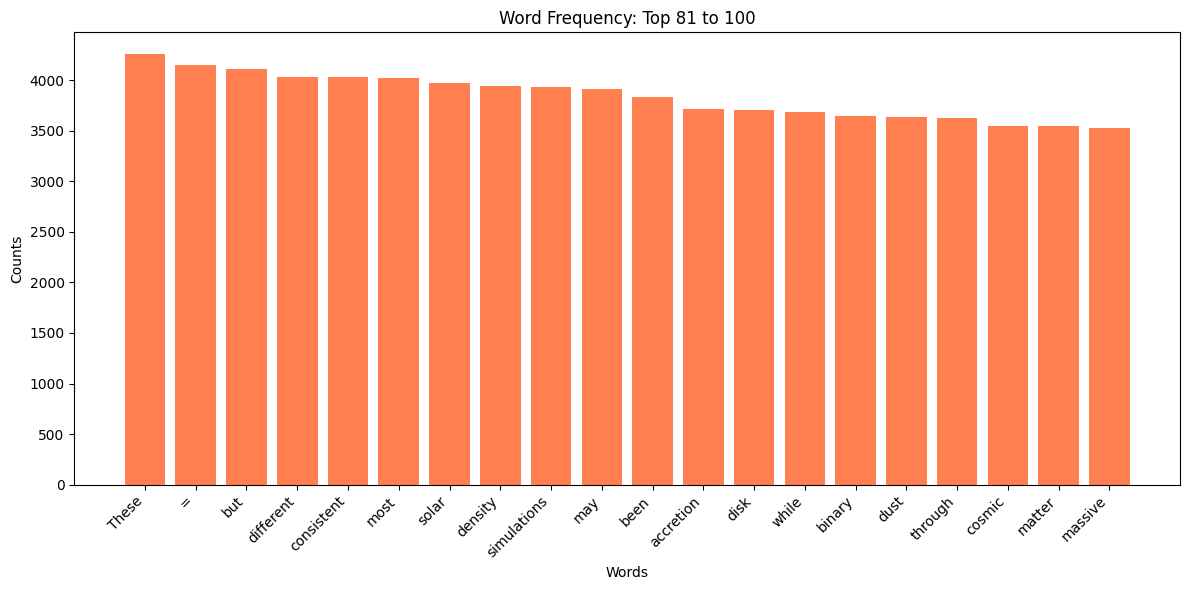

In [4]:
# Range of words to plot (e.g., 0 to 20 for top 20, or 40 to 60)
RANK_START = 80
RANK_END = 100

# Plotting word distribution
plt.figure(figsize=(12, 6))
subset = word_counts[RANK_START:RANK_END]
plt.bar(subset.index, subset.values, color='coral')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title(f'Word Frequency: Top {RANK_START+1} to {RANK_END}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
# Search for phrases in arXiv abstracts
search_phrases = ["machine learning", "high z", "high redshift", "high-z", "low z", 
"low redshift", "low-z", "spiral galaxy", "elliptical galaxy", 
"lenticular galaxy", "irregular galaxy" , "dwarf galaxy", "ellipticals", "spirals",
"lenticuars", "supernova", "supernovae", "SNIa", "Supernova Ia", "supernova Ia",
"LRD", "Little Red Dots", "Accretion", "Black Holes", "GW", "Gravitational Waves", 
"GRB", "GRBs", 'Gamma-Ray Burst', 'gamma-ray burst', 'Gamma Ray Burst', 'gamma ray burst',
"FRB", "Fast Radio Burst", "fast radio burst", "Fast Radio Bursts", "fast radio bursts",
"transients", "lensing", "dark matter", "dark energy", "axions", "WIMPS", "warm dark matter", "cold dark matter",
"White Dwarf", "X-ray Binary", "X-ray binaries", "XRB", "WR", "Wolf-Rayet",
"gamma", "gamma-ray", "x-ray", "uv", "ultraviolet", "optical", "infrared", "microwave", "radio",
"early universe", "early-universe", "cosmic noon",
"cmb", "cosmic microwave background",
"λ CDM", "Lambda CDM",
"Dyson Sphere",
"exoplanets", "exoplanet",
"3I Atlas", "3I/Atlas"]

count_phrases = []

for phrase in search_phrases:
    count_phrases.append(data['abstract'].str.contains(phrase, case=False).sum())

phrase_counts = dict(zip(search_phrases, count_phrases))

# Grouping terms that are variations of the same phrase
same_terms = {
    "high z": ["high z", "high redshift", "high-z"],
    "low z": ["low z", "low redshift", "low-z"],
    "spiral galaxy": ["spiral galaxy", "spirals"],
    "elliptical galaxy": ["elliptical galaxy", "ellipticals"],
    "lenticular galaxy": ["lenticular galaxy", "lenticuars"],
    "supernova": ["supernova", "supernovae"],
    "supernova Ia": ["supernova Ia", "SNIa"],
    "LRD": ["LRD", "Little Red Dots"],
    "black holes": ["Black Holes", "black holes"],
    "GW": ["GW", "Gravitational Waves"],
    "GRB": ["GRB", "GRBs", 'Gamma-Ray Burst', 'gamma-ray burst', 'Gamma Ray Burst', 'gamma ray burst'],
    "FRB": ["FRB", "Fast Radio Burst", "fast radio burst", "Fast Radio Bursts", "fast radio bursts"],
    "axions": ["axions", "cold dark matter"],
    "WIMPS": ["WIMPS", "warm dark matter"],
    "XRB": ["XRB", "X-ray Binary", "X-ray binaries"],
    "WR stars": ["WR", "Wolf-Rayet"],
    "gamma": ["gamma", "gamma-ray"],
    "uv": ["uv", "ultraviolet"],
    "infrared": ["infrared"],
    "early universe": ["early universe", "early-universe"],
    "cmb": ["cmb", "cosmic microwave background"],
    "λ CDM": ["λ CDM", "Lambda CDM"],
    "Exoplanets": ["exoplanets", "exoplanet"],
    "3I Atlas": ["3I Atlas", "3I/Atlas"]

}

consolidated_counts = {}
accounted_for = set()

for main_phrase, aliases in same_terms.items():
    total = 0
    for alias in aliases:
        total += phrase_counts.get(alias, 0)
        accounted_for.add(alias)
    consolidated_counts[main_phrase] = total

for phrase, count in phrase_counts.items():
    if phrase not in accounted_for:
        consolidated_counts[phrase] = count

print(consolidated_counts)


{'high z': 468, 'low z': 189, 'spiral galaxy': 181, 'elliptical galaxy': 58, 'lenticular galaxy': 5, 'supernova': 2438, 'supernova Ia': 63, 'LRD': 240, 'black holes': 1060, 'GW': 999, 'GRB': 1391, 'FRB': 1115, 'axions': 209, 'WIMPS': 53, 'XRB': 435, 'WR stars': 311, 'gamma': 2381, 'uv': 1884, 'infrared': 1526, 'early universe': 455, 'cmb': 1174, 'λ CDM': 10, 'Exoplanets': 1634, '3I Atlas': 61, 'machine learning': 491, 'irregular galaxy': 6, 'dwarf galaxy': 188, 'Supernova Ia': 2, 'Accretion': 1974, 'transients': 411, 'lensing': 867, 'dark matter': 1350, 'dark energy': 829, 'White Dwarf': 500, 'x-ray': 2050, 'optical': 2544, 'microwave': 565, 'radio': 2120, 'cosmic noon': 108, 'Dyson Sphere': 4}


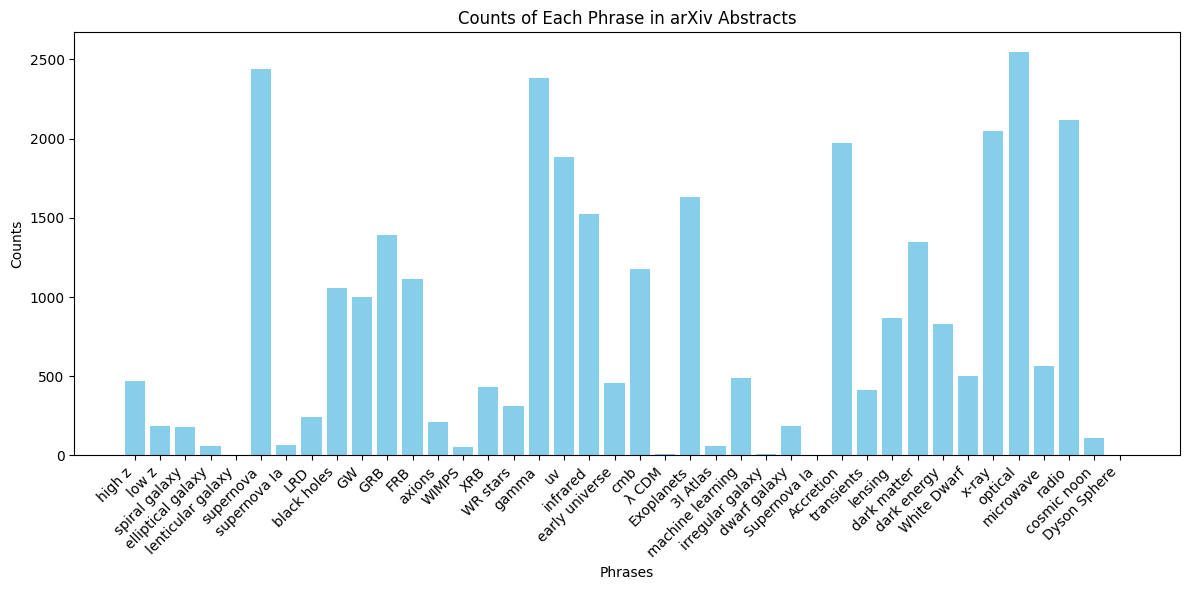

In [6]:
# Bar plot of phrase counts
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(consolidated_counts.keys(), consolidated_counts.values(), color='skyblue')
plt.xlabel('Phrases')
plt.ylabel('Counts')
plt.title('Counts of Each Phrase in arXiv Abstracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# How many times did 'Dyson Sphere' appear in abstracts and titles
dyson_abstract_count = data['abstract'].str.contains('Dyson Sphere', case=False).sum()
dyson_title_count = data['title'].str.contains('Dyson Sphere', case=False).sum()
total_dyson_count = dyson_abstract_count + dyson_title_count
print(f"'Dyson Sphere' appeared {total_dyson_count} times in abstracts and titles.")

# Show me the papers that mentioned 'Dyson Sphere'
dyson_papers = data[data['abstract'].str.contains('Dyson Sphere', case=False) | data['title'].str.contains('Dyson Sphere', case=False)]
print(dyson_papers[['title', 'abstract']])

'Dyson Sphere' appeared 7 times in abstracts and titles.
                                                   title  \
1227   High-resolution imaging of the radio source as...   
1535          Ringworlds and Dyson spheres can be stable   
2037   Earth Detecting Earth: At what distance could ...   
18262  Microlensing Signatures of Dyson Sphere-like S...   

                                                abstract  
1227   We present high-resolution e-MERLIN and EVN (e...  
1535   In his 1856 Adams Prize essay, James Clark Max...  
2037   The field of the Search for Extraterrestrial I...  
18262  We investigate the microlensing detectability ...  


In [11]:
dyson_papers

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries
1227,High-resolution imaging of the radio source as...,We present high-resolution e-MERLIN and EVN (e...,"['Tongtian Ren', 'Michael A. Garrett', 'Andrew...",2.0,6.0,3.0,arxiv.org/pdf/2501.05152,Astrophysics of Galaxies,NaN,MNRAS Letters,...,"MNRAS 538, L56-L61 (2025)",0,"Ren, T.: Jodrell Bank Centre for Astrophysics,...",2.0,2.0,1,1,"['A dwarf stars', 'A stars', 'AGN']",['extraterrestrial intelligence – galaxies: ac...,"United Kingdom, United Kingdom, United Kingdom..."
1535,Ringworlds and Dyson spheres can be stable,"In his 1856 Adams Prize essay, James Clark Max...",['Colin R McInnes'],16.0,19.0,1.0,arxiv.org/pdf/2502.12806,Solar and Stellar Astrophysics,"['Earth and Planetary Astrophysics', 'Popular ...",NaN,...,"MNRAS, 537, 1249-1267 (2025)",0,"McInnes, Colin R.: James Watt School of Engine...",1.0,1.0,1,1,"['Bearing', 'Centre of mass', 'Gravitational i...",['celestial mechanics'],NaN
2037,Earth Detecting Earth: At what distance could ...,The field of the Search for Extraterrestrial I...,"['Sofia Z. Sheikh', 'Macy J. Huston', 'Pinchen...",1.0,18.0,2.0,arxiv.org/pdf/2502.02614,Instrumentation and Methods for Astrophysics,"['Earth and Planetary Astrophysics', 'Popular ...",NaN,...,AJ 169 118 (2025),0,"Sheikh, Sofia Z.: SETI Institute, 339 Bernardo...",7.0,5.0,1,1,"['Atmospheric transmission', 'Detection', 'Ear...",['SETI — technosignatures — exoplanets 1'],"United States, United States, United States, U..."
18262,Microlensing Signatures of Dyson Sphere-like S...,We investigate the microlensing detectability ...,['Shant Baghram'],7.0,9.0,1.0,arxiv.org/pdf/2512.07924,Instrumentation and Methods for Astrophysics,"['Cosmology and Nongalactic Astrophysics', 'Ea...",the Astrophysical Journal,...,NaN,0,NaN,0.0,0.0,1,1,"['Black holes', 'Infrared excess', 'Light curv...",['Search for extraterrestrial intelligence (21...,"Iran, Iran, Armenia"


Top 20 Redshift Phrases:
z = 0: 270
z = 2: 118
z > 6: 91
z = 1: 68
z > 3: 57
z = 4: 57
z = 5: 56
z = 6: 56
z > 5: 54
z < 1: 53
z > 10: 50
z > 4: 48
z > 2: 43
z = 11: 43
z = 10: 42
z < 2: 39
z = 14: 38
z = 7: 37
z = 3: 37
z < 4: 36

Top 20 Redshift Values:
0: 281
2: 226
6: 199
1: 173
5: 164
4: 152
3: 142
10: 108
7: 99
9: 67
0.1: 63
0.5: 60
11: 51
8: 49
2.5: 43
1.5: 42
14: 39
0.2: 37
3.5: 34
12: 33


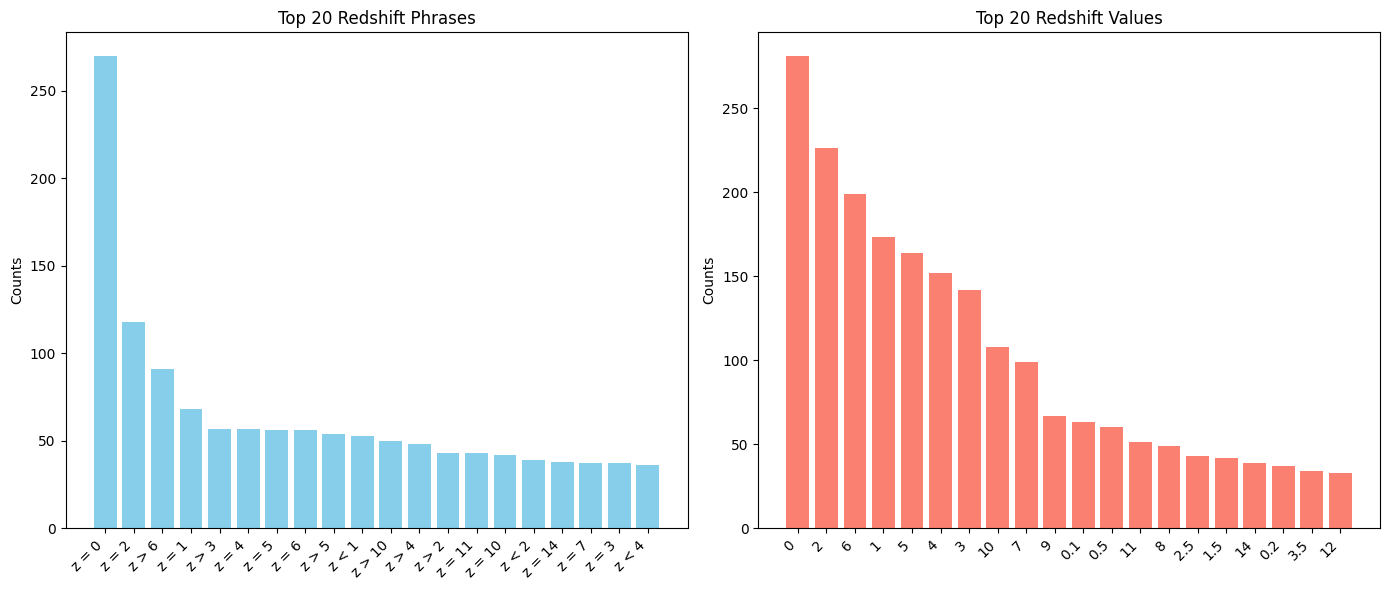

In [45]:
import re
from collections import Counter

# Regex pattern for redshifts: z [operator] [number]
# Supports symbols like =, >, <, ~, approx, sim and decimal numbers
redshift_pattern = re.compile(r'(?i)z\s*([=><~]|approx\.?|sim|greater than|less than)?\s*(\d+(?:\.\d+)?)')

redshift_phrases = []
redshift_values = []

def extract_redshifts(text):
    if not isinstance(text, str):
        return
    matches = redshift_pattern.findall(text)
    for op, val in matches:
        # Reconstruct the phrase
        phrase = f"z {op or '='} {val}".replace('  ', ' ')
        redshift_phrases.append(phrase)
        redshift_values.append(val)

# Process abstracts and titles
data['abstract'].apply(extract_redshifts)
data['title'].apply(extract_redshifts)

phrase_counts = Counter(redshift_phrases)
value_counts = Counter(redshift_values)

print("Top 20 Redshift Phrases:")
for phrase, count in phrase_counts.most_common(20):
    print(f"{phrase}: {count}")

print("\nTop 20 Redshift Values:")
for value, count in value_counts.most_common(20):
    print(f"{value}: {count}")

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_phrases = phrase_counts.most_common(20)
plt.bar([p[0] for p in top_phrases], [p[1] for p in top_phrases], color='skyblue')
plt.title('Top 20 Redshift Phrases')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
top_values = value_counts.most_common(20)
plt.bar([v[0] for v in top_values], [v[1] for v in top_values], color='salmon')
plt.title('Top 20 Redshift Values')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()


In [ ]:
# Convert redshift values to floats
z_floats = [float(v) for v in redshift_values]

if z_floats:
    # Using Interquartile Range (IQR) - 25th to 75th percentile
    lower_limit = np.percentile(z_floats, 25)
    upper_limit = np.percentile(z_floats, 75)
    
    print(f"The most studied redshift zone (Interquartile Range, middle 50%) is:")
    print(f"{lower_limit:.2f} < z < {upper_limit:.2f}")
    
    # slightly broader zone
    p10 = np.percentile(z_floats, 10)
    p90 = np.percentile(z_floats, 90)
    print(f"\nThe broader studied zone (10th to 90th percentile) is:")
    print(f"{p10:.2f} < z < {p90:.2f}")
else:
    print("No redshift values found to calculate the zone.")


The most studied redshift zone (Interquartile Range, middle 50%) is:
0.70 < z < 6.00

The broader studied zone (10th to 90th percentile) is:
0.02 < z < 10.00


In [19]:
# Search for string type 'GWXXXXXX' where X is a digit and there may or may not be a space between GW and the rest
gw_pattern = re.compile(r'GW\s*\d{6}')
gw_events = []
def extract_gw_events(text):
    if not isinstance(text, str):
        return
    matches = gw_pattern.findall(text)
    for match in matches:
        gw_events.append(match.replace(" ", ""))  # Remove any spaces for consistency
# Process abstracts and titles
data['abstract'].apply(extract_gw_events)
data['title'].apply(extract_gw_events)

event_counts = Counter(gw_events)
print("Gravitational Wave Events Mentioned:")
for event, count in event_counts.most_common():
    print(f"{event}: {count}")
# Total counts
total_events = sum(event_counts.values())
unique_events = len(event_counts)
print(f"\nTotal GW event mentions: {total_events}")
print(f"Unique GW events mentioned: {unique_events}")

Gravitational Wave Events Mentioned:
GW170817: 100
GW231123: 93
GW190814: 31
GW230529: 29
GW190425: 22
GW190521: 18
GW231109: 10
GW200105: 8
GW200208: 7
GW190514: 5
GW241011: 5
GW241110: 4
GW200210: 3
GW150914: 3
GW200115: 2
GW170502: 1
GW190512: 1
GW170729: 1
GW190708: 1
GW190503: 1
GW200202: 1
GW170814: 1

Total GW event mentions: 347
Unique GW events mentioned: 22


In [20]:
# Sum Counts of Top 5 events
top_5_events = event_counts.most_common(5)
top_5_sum = sum(count for event, count in top_5_events)
print(f"Total mentions of Top 5 GW events: {top_5_sum}")

# Percentage of top 5 events
top_5_percent = (top_5_sum / total_events) * 100 if total_events > 0 else 0
print(f"Percentage of mentions from Top 5 GW events: {top_5_percent:.2f}%")


Total mentions of Top 5 GW events: 275
Percentage of mentions from Top 5 GW events: 79.25%


In [23]:
# Search for GRB's with fomrat 'GRBXXXXXXZ' where X is a digit and there may or may not be space between GRB and the rest
grb_pattern = re.compile(r'GRB\s*\d{6}')

grb_events = []
def extract_grb_events(text):
    if not isinstance(text, str):
        return
    matches = grb_pattern.findall(text)
    for match in matches:
        grb_events.append(match)

# Process abstracts and titles
data['abstract'].apply(extract_grb_events)
data['title'].apply(extract_grb_events)

grb_counts = Counter(grb_events)
print("Gamma-Ray Burst Events Mentioned:")
for event, count in grb_counts.most_common():
    print(f"{event}: {count}")

# Total counts
total_grbs = sum(grb_counts.values())
unique_grbs = len(grb_counts)
print(f"\nTotal GRB event mentions: {total_grbs}")
print(f"Unique GRB events mentioned: {unique_grbs}")

Gamma-Ray Burst Events Mentioned:
GRB 221009: 75
GRB 211211: 32
GRB 230307: 31
GRB 250702: 24
GRB 170817: 18
GRB 240825: 15
GRB 190114: 11
GRB 240529: 8
GRB 090510: 6
GRB221009: 6
GRB 201216: 6
GRB 220711: 6
GRB 241030: 5
GRB170817: 5
GRB 060614: 5
GRB 200826: 4
GRB 250101: 4
GRB 230812: 4
GRB 170519: 4
GRB 250314: 4
GRB 060729: 3
GRB211211: 3
GRB 210312: 3
GRB 980425: 3
GRB 241105: 3
GRB 250704: 3
GRB 250221: 3
GRB 250114: 3
GRB 120323: 2
GRB 181222: 2
GRB 190606: 2
GRB 180427: 2
GRB090401: 2
GRB 111209: 2
GRB 200914: 2
GRB 200311: 2
GRB 170228: 2
GRB 221023: 2
GRB 180720: 2
GRB 190829: 2
GRB 250404: 2
GRB 191019: 2
GRB 240218: 2
GRB 150101: 2
GRB 231117: 2
GRB 110213: 2
GRB 200925: 2
GRB 230906: 2
GRB 240715: 2
GRB 230204: 2
GRB 220101: 2
GRB 090926: 1
GRB 200131: 1
GRB 121024: 1
GRB 091018: 1
GRB 020813: 1
GRB 210610: 1
GRB 060218: 1
GRB 150403: 1
GRB 050820: 1
GRB 050505: 1
GRB050505: 1
GRB 090831: 1
GRB 180605: 1
GRB 211019: 1
GRB 990123: 1
GRB 131122: 1
GRB 081122: 1
GRB 081126: 

In [28]:
# Sum Counts of Top 5 events
top_5_events = grb_counts.most_common(5)
top_5_sum = sum(count for event, count in top_5_events)
print(f"Total mentions of Top 5 GRB events: {top_5_sum}")

# Percentage of top 5 events
top_5_percent = (top_5_sum / total_grbs) * 100 if total_grbs > 0 else 0
print(f"Percentage of mentions from Top 5 GRB events: {top_5_percent:.2f}%")


Total mentions of Top 5 GRB events: 180
Percentage of mentions from Top 5 GRB events: 47.87%


In [29]:
# Search for FRB's with fomrat 'FRBXXXXXXZ' where X is a digit and there may or may not be space between GRB and the rest
frb_pattern = re.compile(r'FRB\s*\d{6}')
frb_events = []

def extract_frb_events(text):
    if not isinstance(text, str):
        return
    matches = frb_pattern.findall(text)
    for match in matches:
        frb_events.append(match)

# Process abstracts and titles
data['abstract'].apply(extract_frb_events)
data['title'].apply(extract_frb_events)

frb_counts = Counter(frb_events)
print("Fast Radio Burst Events Mentioned:")
for event, count in frb_counts.most_common():
    print(f"{event}: {count}")

# Total counts
total_frbs = sum(frb_counts.values())
unique_frbs = len(frb_counts)
print(f"\nTotal FRB event mentions: {total_frbs}")
print(f"Unique FRB events mentioned: {unique_frbs}")

Fast Radio Burst Events Mentioned:
FRB 201211: 26
FRB 202401: 23
FRB 202011: 16
FRB 201809: 14
FRB 201905: 13
FRB 202503: 10
FRB 202406: 9
FRB 202412: 6
FRB 202004: 6
FRB 200428: 5
FRB 201904: 5
FRB202401: 5
FRB 202209: 4
FRB 202205: 4
FRB 202305: 4
FRB 202204: 4
FRB 121102: 3
FRB 202309: 3
FRB 202402: 2
FRB 202001: 2
FRB 202306: 2
FRB 202210: 2
FRB 202403: 2
FRB 202307: 2
FRB201905: 2
FRB 221014: 1
FRB 202312: 1
FRB 201903: 1
FRB 202311: 1
FRB 180916: 1
FRB 202308: 1
FRB 201808: 1
FRB 200204: 1
FRB201872: 1
FRB 180814: 1
FRB201211: 1
FRB201904: 1
FRB202211: 1
FRB201811: 1
FRB220190: 1
FRB 202409: 1

Total FRB event mentions: 190
Unique FRB events mentioned: 41


In [30]:
# Sum Counts of Top 5 events
top_5_events = frb_counts.most_common(5)
top_5_sum = sum(count for event, count in top_5_events)
print(f"Total mentions of Top 5 GW events: {top_5_sum}")

# Percentage 
top_5_percent = (top_5_sum / total_frbs) * 100 if total_frbs > 0 else 0
print(f"Percentage of mentions from Top 5 GW events: {top_5_percent:.2f}%")

Total mentions of Top 5 GW events: 92
Percentage of mentions from Top 5 GW events: 48.42%


In [33]:
# What number of Unique Events for GW, GRB and FRB contribute to 70% of mentions?
def unique_events_for_percentage(event_counts, percentage):
    total_mentions = sum(event_counts.values())
    target_mentions = (percentage / 100) * total_mentions
    
    cumulative_mentions = 0
    unique_events = 0
    
    for event, count in event_counts.most_common():
        cumulative_mentions += count
        unique_events += 1
        if cumulative_mentions >= target_mentions:
            break
            
    return unique_events    

gw_unique_events_70 = unique_events_for_percentage(event_counts, 80)
grb_unique_events_70 = unique_events_for_percentage(grb_counts, 80)
frb_unique_events_70 = unique_events_for_percentage(frb_counts, 80)

print(f"Unique GW events contributing to 70% of mentions: {gw_unique_events_70}")
print(f"Unique GRB events contributing to 70% of mentions: {grb_unique_events_70}")
print(f"Unique FRB events contributing to 70% of mentions: {frb_unique_events_70}")

Unique GW events contributing to 70% of mentions: 6
Unique GRB events contributing to 70% of mentions: 30
Unique FRB events contributing to 70% of mentions: 16


In [7]:
# Count average number of words in a title and abstract
data['title_word_count'] = data['title'].apply(lambda x: len(str(x).split()))
data['abstract_word_count'] = data['abstract'].apply(lambda x: len(str(x).split()))

# Average word counts
avg_title_word_count = data['title_word_count'].mean()
avg_abstract_word_count = data['abstract_word_count'].mean()
print(f"Average Title Word Count: {avg_title_word_count:.0f}")
print(f"Average Abstract Word Count: {avg_abstract_word_count:.0f}")

Average Title Word Count: 13
Average Abstract Word Count: 211


In [10]:
# Title and Abstract Standard Deviations
std_title_word_count = data['title_word_count'].std()
std_abstract_word_count = data['abstract_word_count'].std()
print(f"Title Word Count Standard Deviation: {std_title_word_count:.2f}")
print(f"Abstract Word Count Standard Deviation: {std_abstract_word_count:.2f}")

# Count for words in title and abstract in different primary subject areas
subject_areas = data['primary_subject'].unique()
subject_area_word_counts = {}
for subject in subject_areas:
    subject_data = data[data['primary_subject'] == subject]
    avg_title_wc = subject_data['title_word_count'].mean()
    avg_abstract_wc = subject_data['abstract_word_count'].mean()
    subject_area_word_counts[subject] = {
        'avg_title_word_count': avg_title_wc,
        'avg_abstract_word_count': avg_abstract_wc
    }
print(subject_area_word_counts)

# Print Rankings
sorted_by_title_wc = sorted(subject_area_word_counts.items(), key=lambda x: x[1]['avg_title_word_count'], reverse=True)
sorted_by_abstract_wc = sorted(subject_area_word_counts.items(), key=lambda x: x[1]['avg_abstract_word_count'], reverse=True)
print("Subject Areas Ranked by Average Title Word Count:")
for subject, counts in sorted_by_title_wc:
    print(f"{subject}: {counts['avg_title_word_count']:.2f}")
print("\nSubject Areas Ranked by Average Abstract Word Count:")
for subject, counts in sorted_by_abstract_wc:
    print(f"{subject}: {counts['avg_abstract_word_count']:.2f}")

# Are Lowest and Highest Primary Subject Areas for Title and Abstract within 1 Standard Deviation of the Mean?
mean_title_wc = avg_title_word_count
mean_abstract_wc = avg_abstract_word_count
title_wc_within_std = []
abstract_wc_within_std = []

for subject, counts in subject_area_word_counts.items():
    if abs(counts['avg_title_word_count'] - mean_title_wc) <= std_title_word_count:
        title_wc_within_std.append(subject)
    if abs(counts['avg_abstract_word_count'] - mean_abstract_wc) <= std_abstract_word_count:
        abstract_wc_within_std.append(subject)
print("Subject Areas with Title Word Count within 1 Std Dev of Mean:")
print(title_wc_within_std)
print("Subject Areas with Abstract Word Count within 1 Std Dev of Mean:")
print(abstract_wc_within_std)

Title Word Count Standard Deviation: 4.16
Abstract Word Count Standard Deviation: 52.65
{'Astrophysics of Galaxies': {'avg_title_word_count': 13.571306939123032, 'avg_abstract_word_count': 227.40804597701148}, 'High Energy Astrophysical Phenomena': {'avg_title_word_count': 12.375165125495377, 'avg_abstract_word_count': 203.15006605019815}, 'Instrumentation and Methods for Astrophysics': {'avg_title_word_count': 11.3263723150358, 'avg_abstract_word_count': 184.73090692124106}, 'Solar and Stellar Astrophysics': {'avg_title_word_count': 12.78815018945918, 'avg_abstract_word_count': 217.13503272476748}, 'Cosmology and Nongalactic Astrophysics': {'avg_title_word_count': 11.718670076726342, 'avg_abstract_word_count': 197.71647789550602}, 'Earth and Planetary Astrophysics': {'avg_title_word_count': 12.601586602027325, 'avg_abstract_word_count': 218.92199206698987}, 'Astrophysics': {'avg_title_word_count': 12.76865671641791, 'avg_abstract_word_count': 207.3544776119403}}
Subject Areas Ranked b

In [ ]:
# Most Common word in abstracts and titles each month
